In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
import glob
import os
import  datetime
%matplotlib inline 

## Bike Ride Sharing Analysis for Ford GoBike Program for San Francisco city

In [2]:
# importing the cleaned dataset from exploratory analysis part of this project
bike_data_clean = pd.read_csv('bike_data_clean.csv')

In [3]:
bike_data_clean.shape

(1750534, 17)

## Investigation Overiew



### In this analysis I mainly wanted to observe how Bike ride usage aries across Usual customers and subscribers. I have highly used columns carrying the information about day/week/month of the bike usage, member age, member gender , user type.






## Dataset Overview



### The data consists of monthwise information regarding bike rides made by users over year 2018.  After combining all the input files, merged dataset has ~1.7 million bike rides and their features such as : 

- duration
- start/ end time
- start/ end station information
- user information

## Bike ride usage across usual customers and subscribers
 
 - Out of total bike rides, ~89% of bike rides are done by subscribers and only ~11% of rides are done by customer which clearly depicts that subscribers make use of this program a lot more than usual customers 


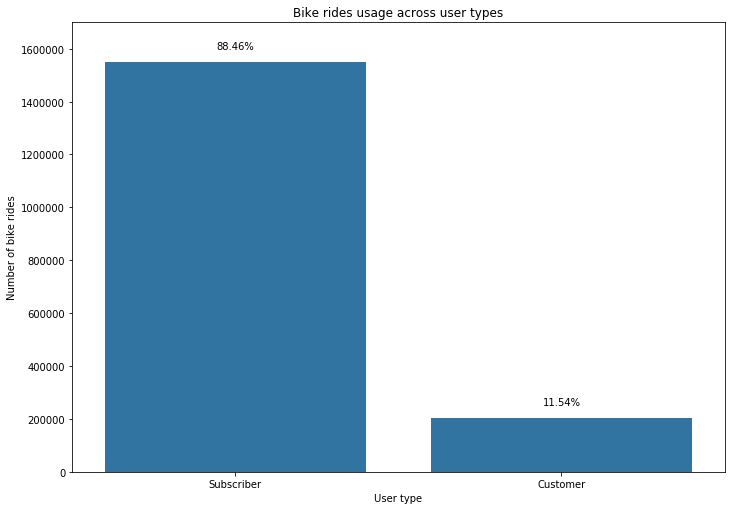

In [18]:
user_type_counts = bike_data_clean['user_type'].value_counts()
total_count = bike_data_clean.shape[0]
color  =sb.color_palette()[0]
plt.figure(figsize=[11.69 , 8.27])
sb.countplot(data=bike_data_clean , x= 'user_type', color=color)
plt.xlabel('User type')
plt.ylabel('Number of bike rides')
plt.title('Bike rides usage across user types')
plt.ylim(0,1700000)
for i in range(user_type_counts.shape[0]):
    count = user_type_counts[i]
    pct_string = '{:0.2f}%'.format(100*count/total_count)
    plt.text(i , count+50000, pct_string , ha= 'center')


### Bike Ride sharing across user types
- Usual customers have not shared a bike ride at all contributing to 12% of total user whi have not shared a ride

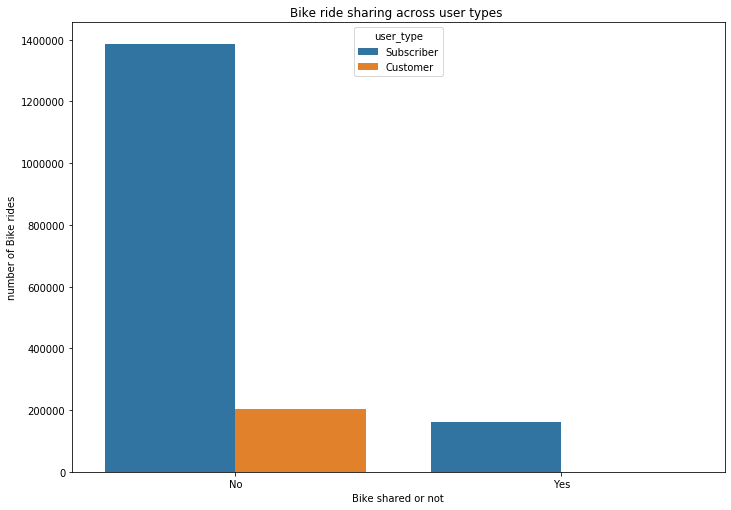

In [20]:
plt.figure(figsize=[11.69 , 8.27]);
sb.countplot(data = bike_data_clean , hue= 'user_type', x='bike_share_for_all_trip')
plt.xlabel('Bike shared or not')
plt.ylabel('number of Bike rides')

plt.title('Bike ride sharing across user types ');


### User types Vs across member age and count of bike rides

- It's very interesting to see that a lot of subscribers are in the age range (20-40) so , these could be the working people using the bike more often

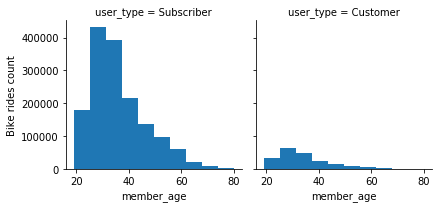

In [5]:

g = sb.FacetGrid(data=bike_data_clean , col='user_type')
g.map(plt.hist ,'member_age')

g.set_axis_labels("member_age", "Bike rides count");

### Performance comparison between customers and subscribers across genders over all months

- Subsribers have used most of their rides in the month of October. Also, bike usage trend is quite comparable across months June, July , August and September( higher than the remaining months) . That means most subscribers prefer to ride bikes in summer
- For customers , maximum usage of buikes is also in months June, July , August and September which states that usual customers ( say they are visiting) like to ride bikes in summer.

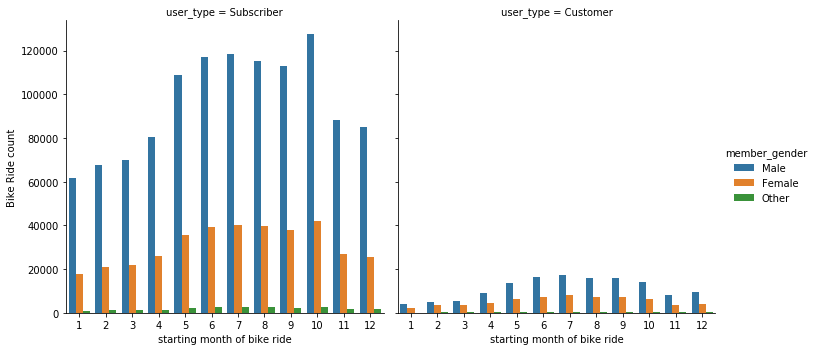

In [9]:

g = sb.catplot(data=bike_data_clean, x='start_time_month', col="user_type", hue="member_gender", kind='count')

g.set_axis_labels("starting month of bike ride" , "Bike Ride count");



## Performance comparison between customers and subscribers across genders over days of the week

- Bike ride usage by usual customers is quite similar over days of the week. where interestingly, subscribers show maximum usage on weekdays as compared to weekends



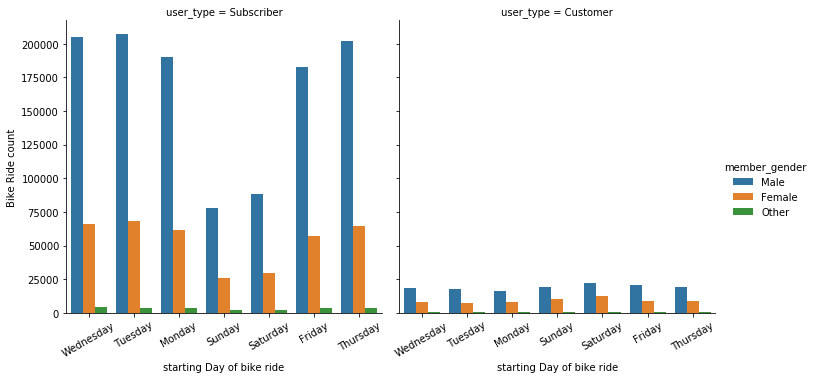

In [13]:
g = sb.catplot(data=bike_data_clean, x='start_time_day_name', col="user_type", hue="member_gender", kind='count')
g.set_axis_labels("starting Day of bike ride" , "Bike Ride count");
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(30)

